Please run those two cells before running the Notebook!

As those plotting settings are standard throughout the book, we do not show them in the book every time we plot something.

In [51]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# FIX: Use the official public API path from pandas.errors
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

# Chapter 11 - Bonus content

In the first edition of the book, we have explored the performance of the 1/n portfolio using the `pyfolio` library. However, since that time the company that was responsible for the library (Quantopian) was closed, and the library is not actively maintained anymore. The library still works, as you can see in the cells below. Alternatively, you can use the `pyfolio-reloaded`, which is a fork of the original library maintained by Stefan Jansen, the author of *Machine Learning for Algorithmic Trading*. On a side note, he is also the maintainer of `zipline-reloaded`, which is a fork of one of the most popular backtesting libraries, which shared the exact same fate as `pyfolio`. You can find the link to `pyfolio-reloaded` below:

* https://github.com/stefan-jansen/pyfolio-reloaded

## 11.1 Evaluating the performance of a basic 1/n portfolio

### How to do it...

1. Import the libraries:

In [58]:
# FIX: Install the PyPortfolioOpt library
!pip install PyPortfolioOpt

In [59]:
import yfinance as yf
import numpy as np
import pandas as pd
import pyfolio as pf

2. Set up the parameters:

In [61]:
# FIX: Replaced the old 'FB' ticker with the new 'META' ticker
RISKY_ASSETS = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

START_DATE = "2020-01-01"
END_DATE = "2021-12-31"

3. Download the stock prices from Yahoo Finance:

[*********************100%***********************]  5 of 5 completed


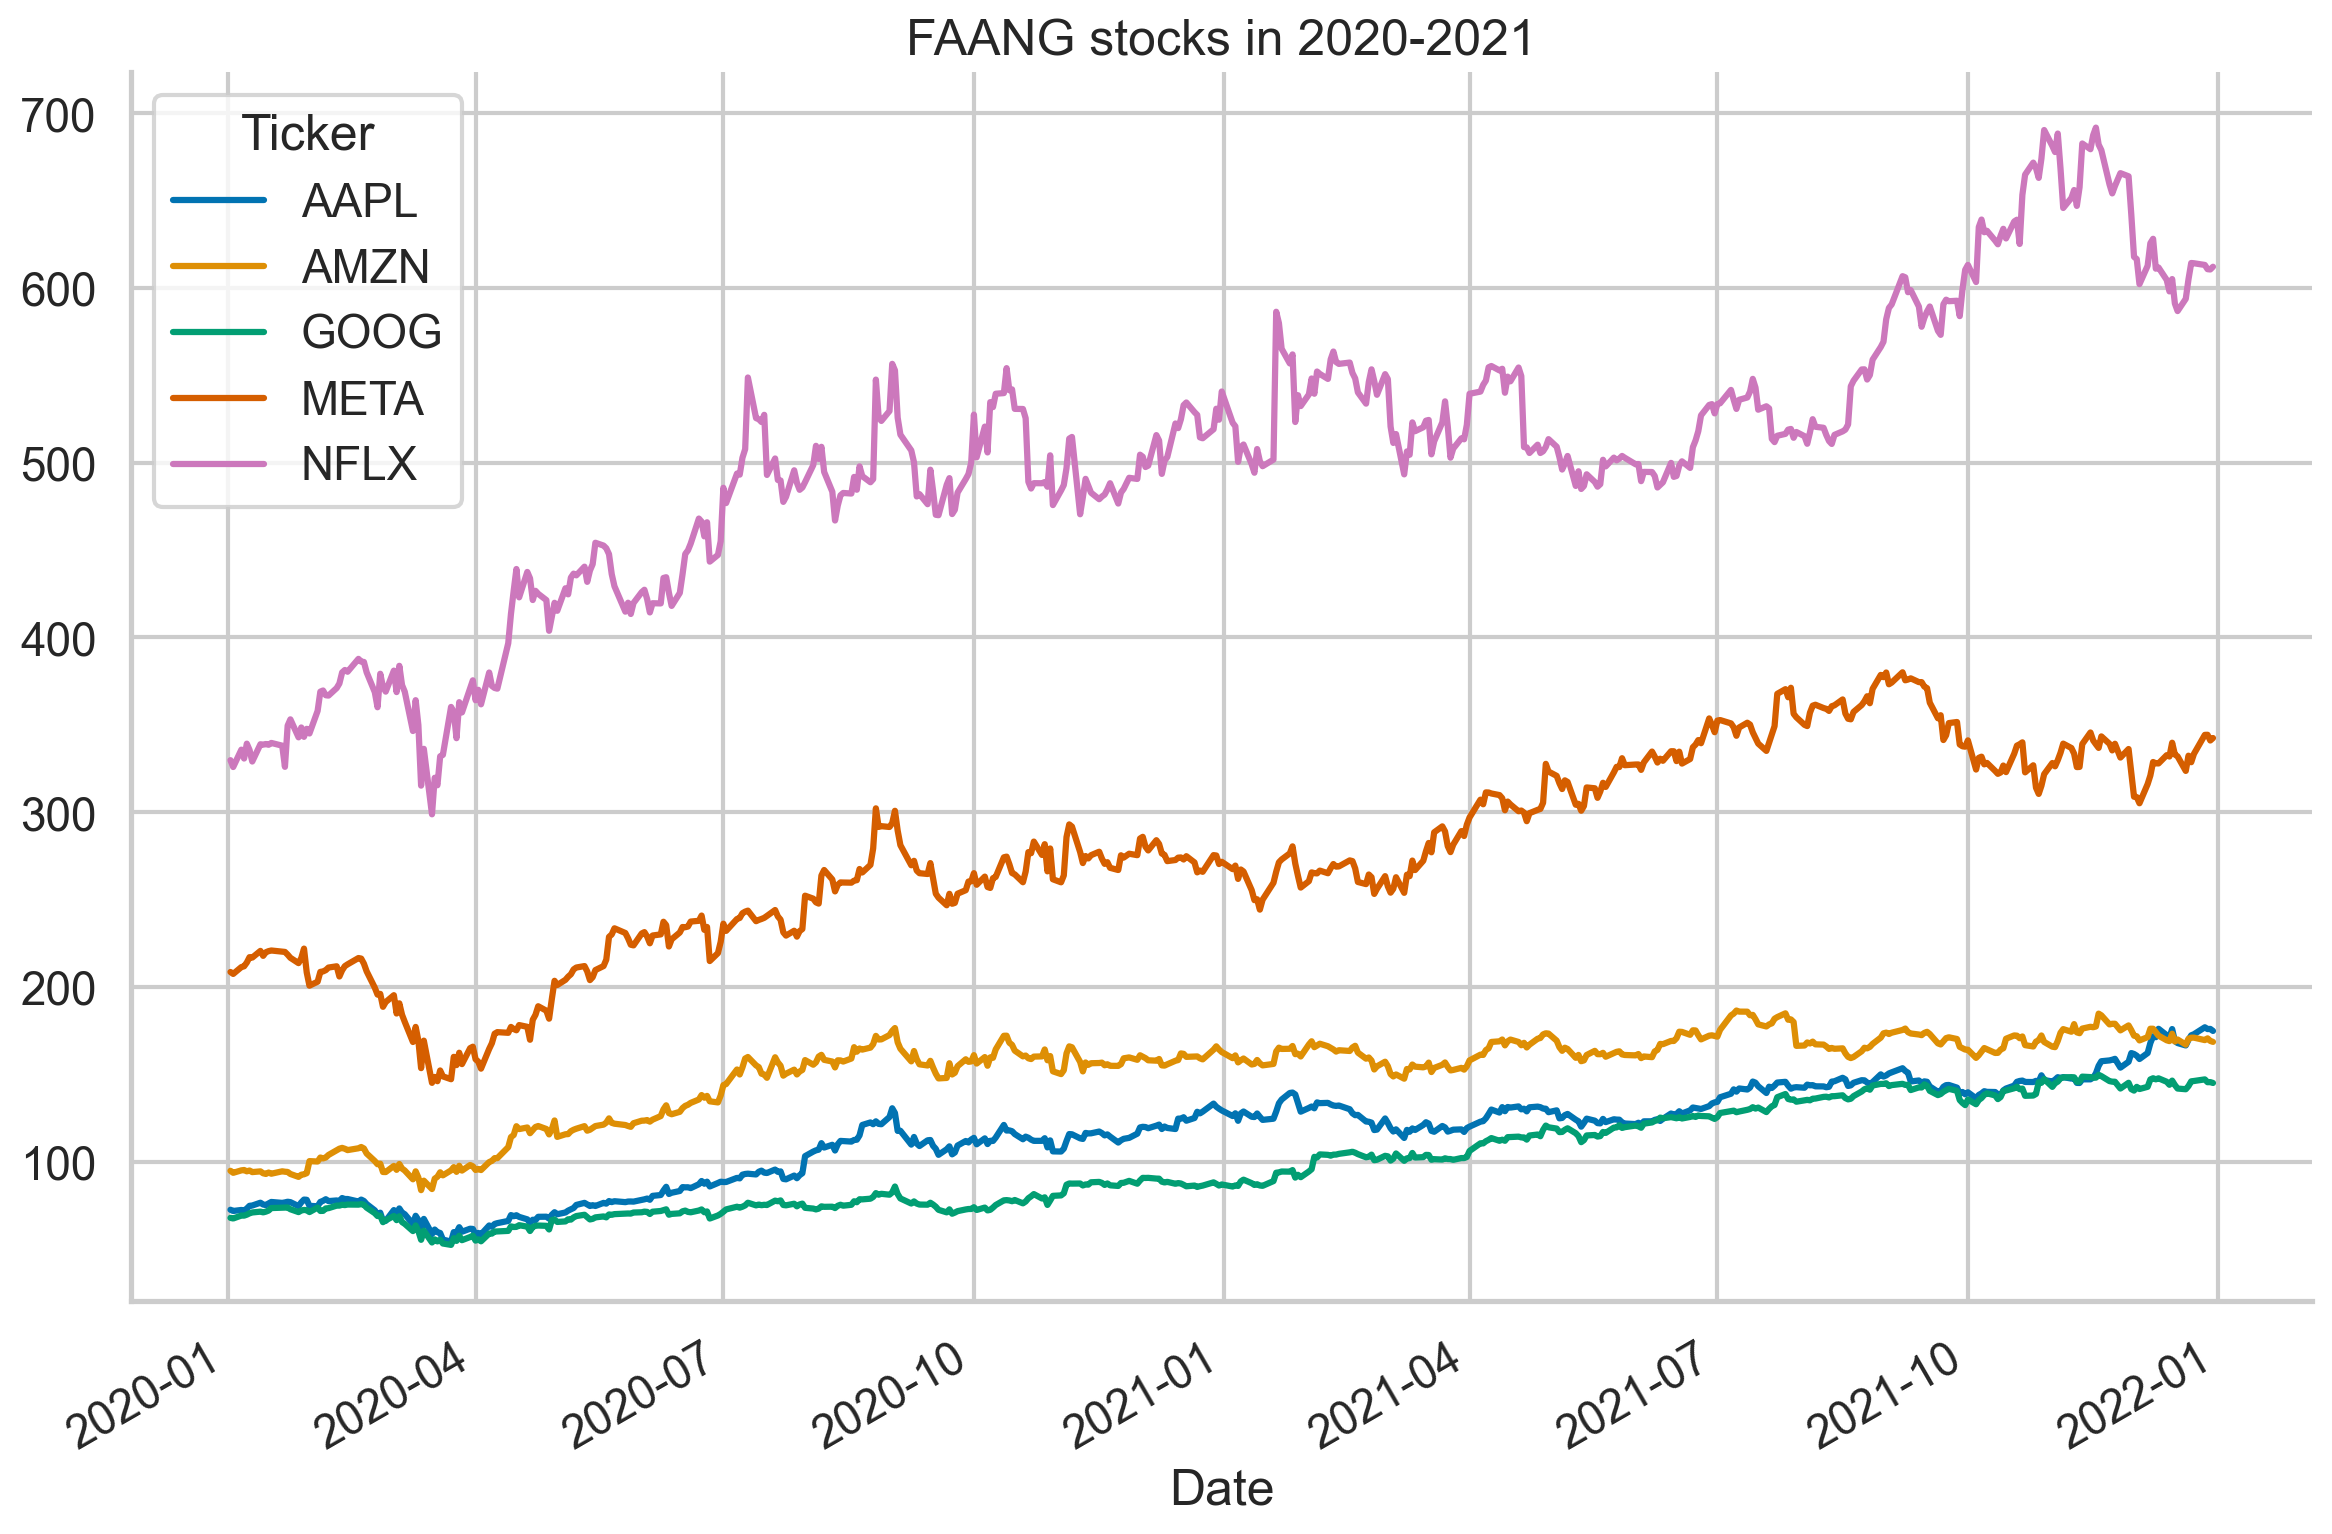

In [63]:
prices_df = yf.download(RISKY_ASSETS,
                        start=START_DATE, 
                        end=END_DATE, 
                        auto_adjust=True) # FIX: Replaced 'adjusted' with 'auto_adjust'

# FIX: Use the 'Close' column which now contains the adjusted prices
prices_df["Close"].plot(title="FAANG stocks in 2020-2021");

sns.despine()
plt.tight_layout()

4. Calculate individual asset returns:

In [65]:
# FIX: Use the 'Close' column which now contains the adjusted prices
returns = prices_df['Close'].pct_change().dropna()

5. Define the weights:

In [67]:
portfolio_weights = n_assets * [1 / n_assets]

6. Calculate portfolio returns:

In [69]:
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), 
                              index=returns.index)

7. Create the tear sheet (simple variant):

Start date,2020-01-03
End date,2021-12-30
Total months,23
,Backtest
Annual return,42.362%
Cumulative returns,102.385%
Annual volatility,30.027%
Sharpe ratio,1.33
Calmar ratio,1.61
Stability,0.91
Max drawdown,-26.346%


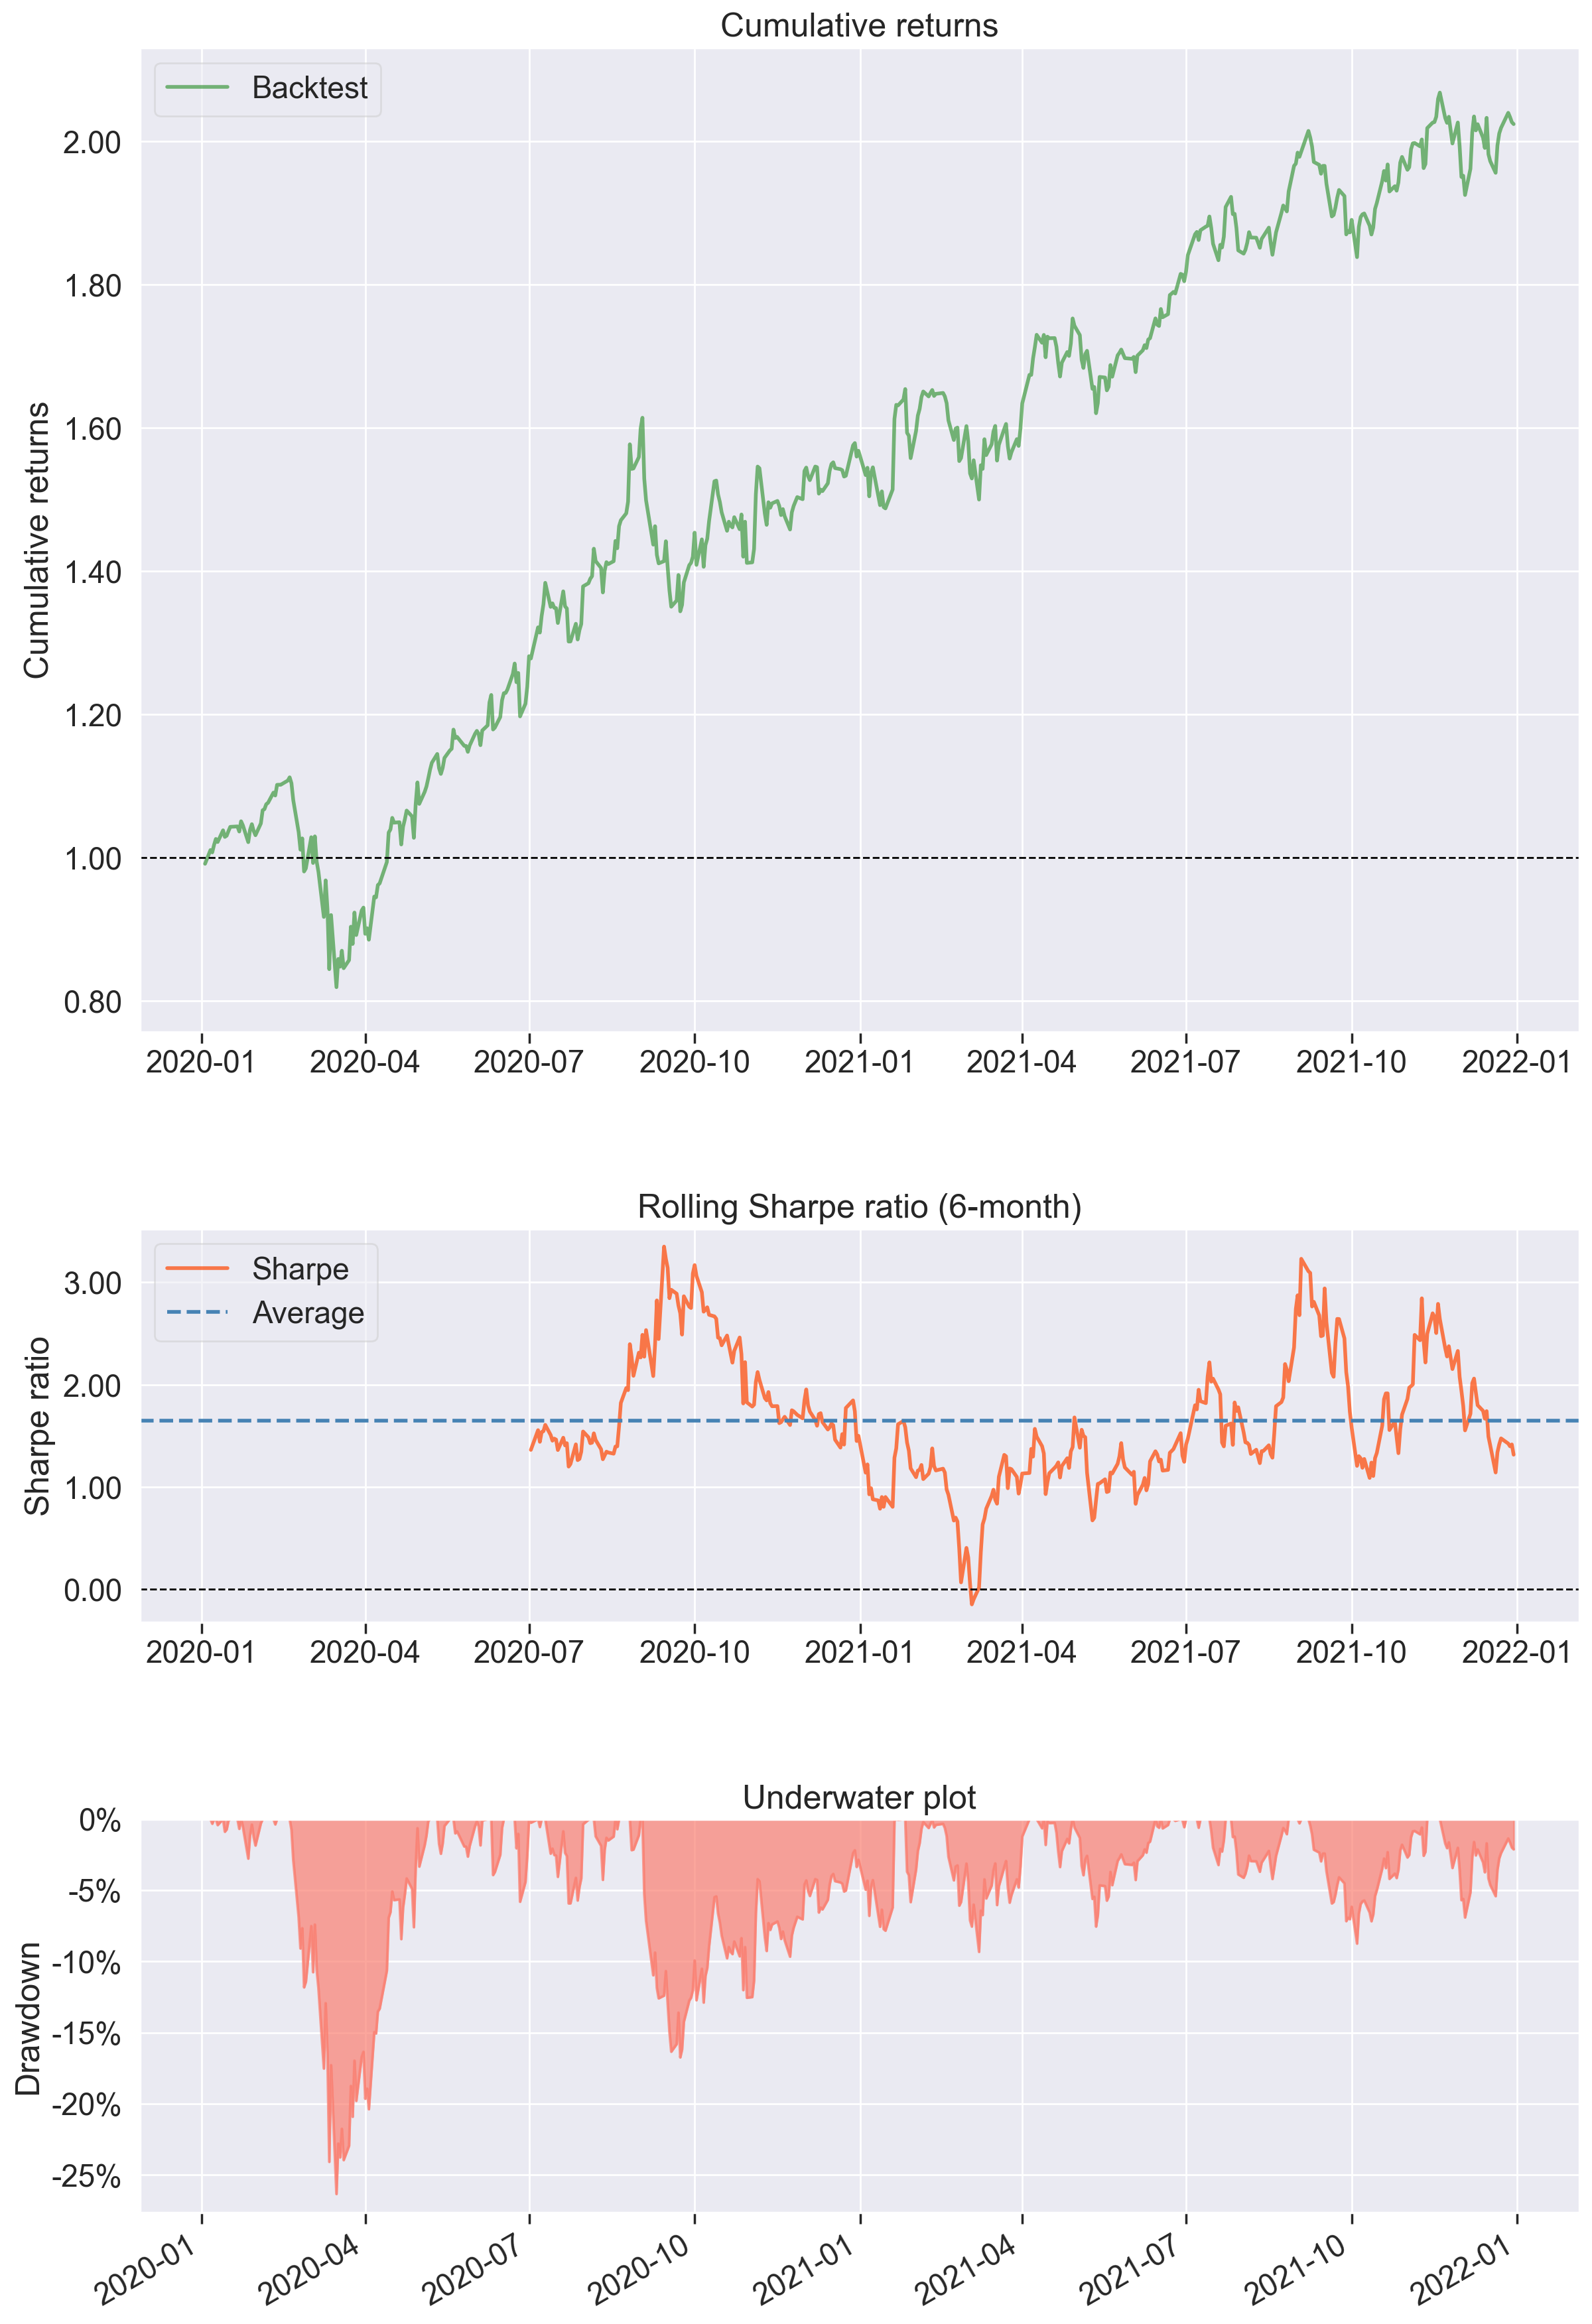

In [71]:
pf.create_simple_tear_sheet(portfolio_returns)

### There's more

Start date,2020-01-03
End date,2021-12-30
Total months,23
,Backtest
Annual return,42.362%
Cumulative returns,102.385%
Annual volatility,30.027%
Sharpe ratio,1.33
Calmar ratio,1.61
Stability,0.91
Max drawdown,-26.346%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,26.35,2020-02-19,2020-03-16,2020-05-07,57
1,16.75,2020-09-02,2020-09-23,2021-01-21,102
2,9.33,2021-01-26,2021-03-08,2021-04-05,50
3,8.75,2021-09-07,2021-10-04,2021-11-12,49
4,7.55,2021-04-29,2021-05-12,2021-06-14,33


C:\Users\Lenovo\anaconda3\Lib\site-packages\pyfolio\plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


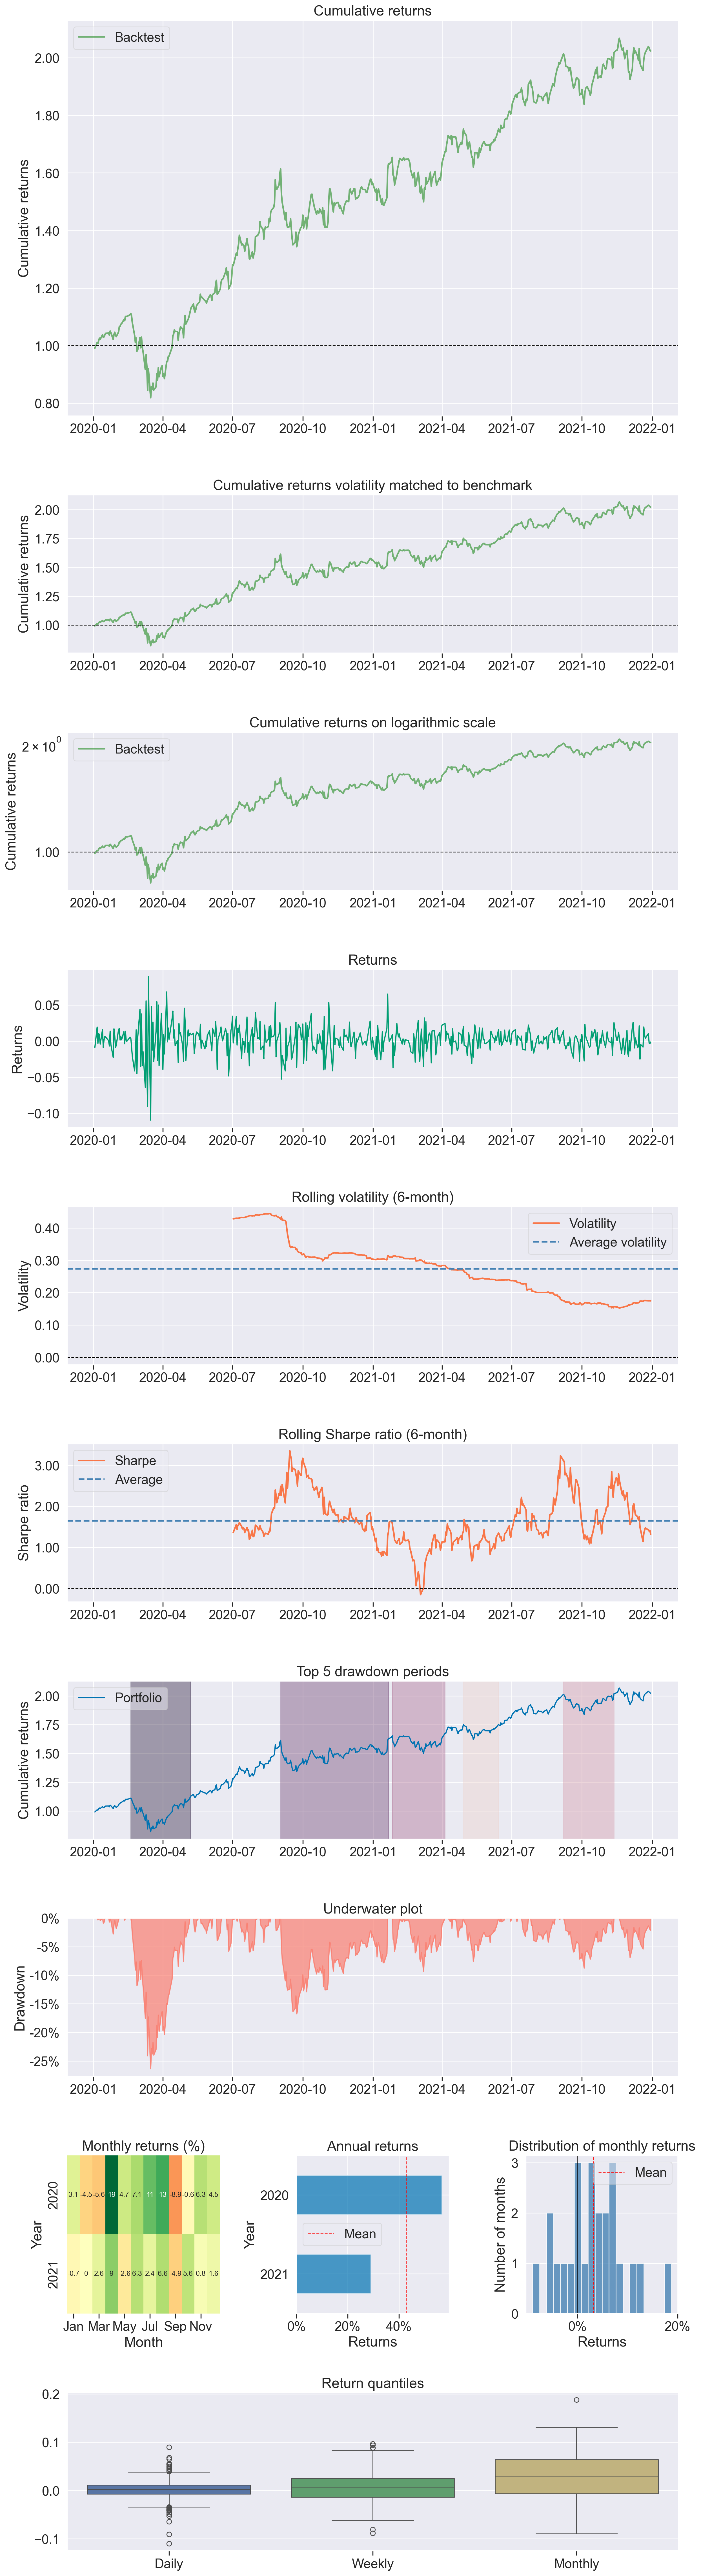

In [73]:
pf.create_returns_tear_sheet(portfolio_returns)